In [4]:
#Part IV: Elastic Net Regression using Gradient Descent [30 points]

In [6]:
#1. Import required libraries  -

import pandas as pd
import numpy as np

In [8]:
#2. Data analysis and preprocessing -

# Using the preprocessing of wine quality dataset done in part 1

data1 = pd.read_csv("/Users/smituplenchwar/Downloads/wine_quality/winequality-red.csv")

In [10]:
data1.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85...
freq,4


In [12]:
# We can see that for some reason the all the columns have been converged into a single column, so we will first split the columns
#Spliting the single column into separate columns using semicolon (;) as the delimiter
df1 = data1['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

# Renaming columns for better readability
df1.columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                      "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", 
                      "alcohol", "quality"]

# Convert columns to numeric types
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [14]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
data2 = pd.read_csv("/Users/smituplenchwar/Downloads/wine_quality/winequality-white.csv")

In [18]:
data2.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,4898
unique,3961
top,7.3;0.19;0.27;13.9;0.057;45;155;0.99807;2.94;0...
freq,8


In [20]:
# Repeating the same steps for the white wine datset
#Spliting the single column into separate columns using semicolon (;) as the delimiter
df2 = data2['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

# Renaming columns for better readability
df2.columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                      "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", 
                      "alcohol", "quality"]

# Convert columns to numeric types
df2 = df2.apply(pd.to_numeric, errors='coerce')

In [22]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [24]:
#We will now combine the 2 datasets into 1 for simplification

dfw = pd.concat([df1, df2], axis=0)

In [26]:
dfw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [28]:
dfw.shape

(6497, 12)

In [30]:
# Handle missing entries -

dfw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
# As we can see that there are no null or missing entries in the dataset, so we will not need to make any changes to the dataset


In [34]:
# Handle mismatched string formats -

#As, we only have numerical values in our dataset we will not need to make any changes to the dataset

In [36]:
# 5. Handle outliers. Detect and manage outliers within the dataset.

for column in dfw.columns:
    Q1 = dfw[column].quantile(0.25)
    Q3 = dfw[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dfw[(dfw[column] < lower_bound) | (dfw[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(dfw)) * 100
    print(column," - ",outlier_percentage)


fixed acidity  -  5.494843774049561
volatile acidity  -  5.802678159150377
citric acid  -  7.83438510081576
residual sugar  -  1.816222872094813
chlorides  -  4.402031706941665
free sulfur dioxide  -  0.9542865938125289
total sulfur dioxide  -  0.15391719255040787
density  -  0.04617515776512237
pH  -  1.1235955056179776
sulphates  -  2.9398183777127906
alcohol  -  0.04617515776512237
quality  -  3.5093119901492997


In [38]:
# As percenatge of outliers in our data is for some columns is >5%, therefore we will update the columns 
# with their respective mean or median values to 

for column in dfw.columns:
    Q1 = dfw[column].quantile(0.25)
    Q3 = dfw[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean1 = dfw[column].mean()
    dfw[column] = np.where((dfw[column] < lower_bound) | (dfw[column] > upper_bound),dfw[column].mean(), dfw[column])

In [40]:
# Using any data visualization library (e.g. matplotlib, seaborn, plotly), provide at least 5
# visualization graphs related to your dataset.

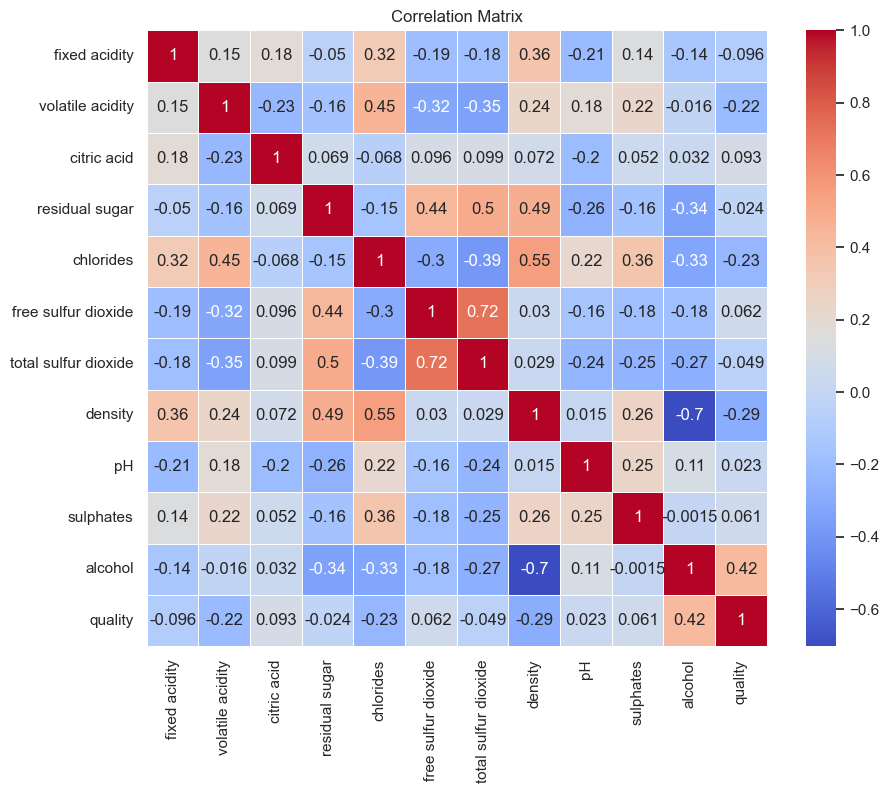

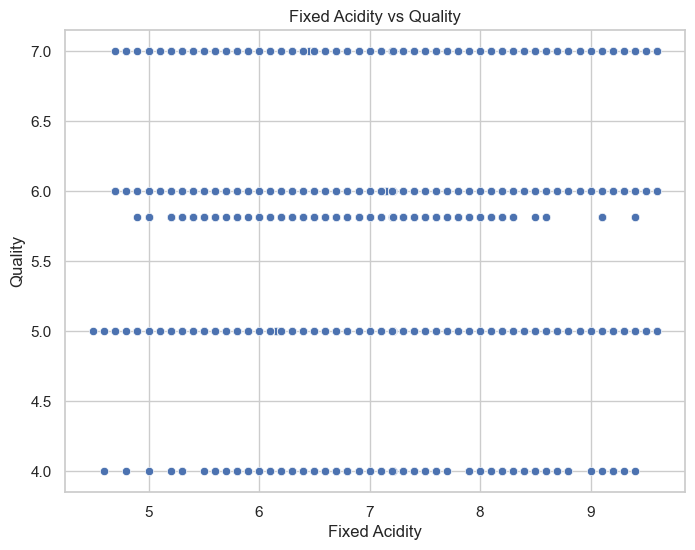

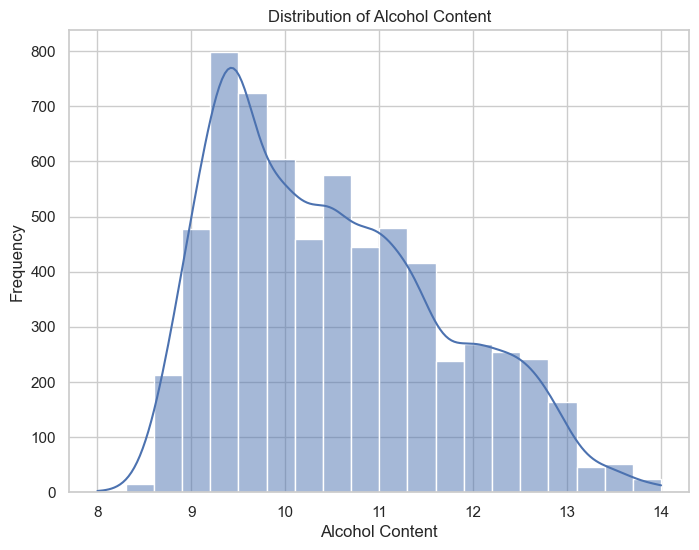

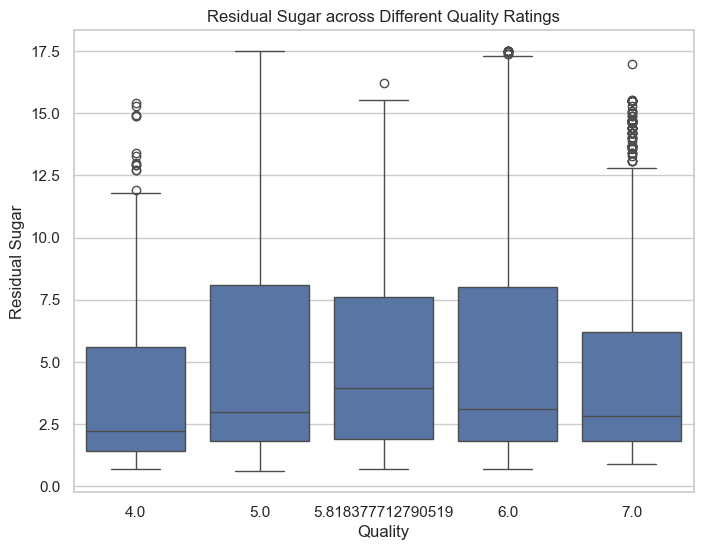

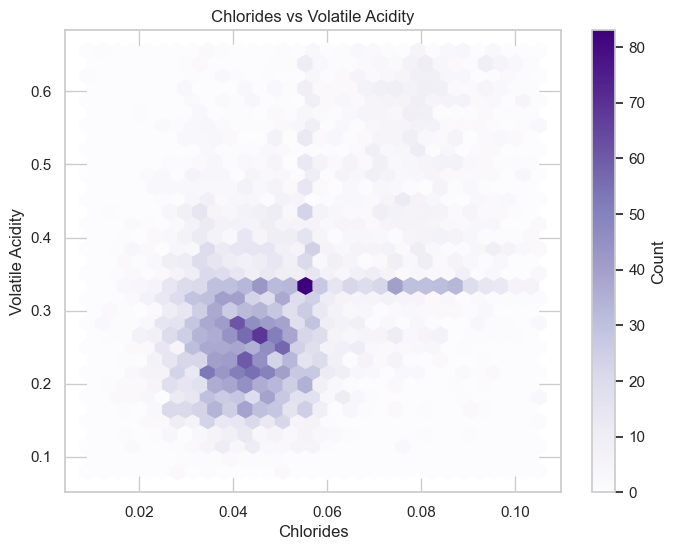

In [42]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
correlation_matrix = dfw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='quality', data=dfw)
plt.title('Fixed Acidity vs Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(dfw['alcohol'], bins=20, kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='residual sugar', data=dfw)
plt.title('Residual Sugar across Different Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(dfw['chlorides'], dfw['volatile acidity'], gridsize=30, cmap='Purples')
plt.title('Chlorides vs Volatile Acidity')
plt.xlabel('Chlorides')
plt.ylabel('Volatile Acidity')
plt.colorbar(label='Count')
plt.show()

In [43]:
# Identify uncorrelated or unrelated features.

#Chosing quality as target column - wee will convert it to binary
# Wines with quality <=6 will be termed as 0(low) and quality>6 will be 1(high)

dfw['quality_encoded'] = dfw['quality'].apply(lambda x: 1 if x>6 else 0)

correlation_matrix = dfw.corr()

correlation_matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_encoded
fixed acidity,1.000000,0.153468,0.183395,-0.049737,0.318582,-0.191573,-0.184657,0.362402,-0.214040,0.141773,-0.137173,-0.095830,-0.058414
volatile acidity,0.153468,1.000000,-0.227329,-0.163830,0.448856,-0.320349,-0.345728,0.240317,0.182927,0.222686,-0.016371,-0.215726,-0.114098
citric acid,0.183395,-0.227329,1.000000,0.068715,-0.067599,0.096103,0.099068,0.072163,-0.204734,0.051889,0.031876,0.093411,0.059315
residual sugar,-0.049737,-0.163830,0.068715,1.000000,-0.152961,0.436082,0.498552,0.485933,-0.260062,-0.163753,-0.343709,-0.023844,-0.055890
chlorides,0.318582,0.448856,-0.067599,-0.152961,1.000000,-0.302541,-0.394877,0.553230,0.216571,0.358655,-0.326825,-0.232884,-0.173155
free sulfur dioxide,-0.191573,-0.320349,0.096103,0.436082,-0.302541,1.000000,0.721746,0.029649,-0.155704,-0.184951,-0.184286,0.062384,0.005689
total sulfur dioxide,-0.184657,-0.345728,0.099068,0.498552,-0.394877,0.721746,1.000000,0.029076,-0.242692,-0.254786,-0.270306,-0.048678,-0.057793
density,0.362402,0.240317,0.072163,0.485933,0.553230,0.029649,0.029076,1.000000,0.015321,0.259849,-0.702234,-0.288135,-0.237066
pH,-0.214040,0.182927,-0.204734,-0.260062,0.216571,-0.155704,-0.242692,0.015321,1.000000,0.245715,0.107725,0.023332,0.025916
sulphates,0.141773,0.222686,0.051889,-0.163753,0.358655,-0.184951,-0.254786,0.259849,0.245715,1.000000,-0.001523,0.060896,0.045920


In [46]:
# Based on the data from correlation matrix , fololowing columns have the lowest correlation coefcient
# (i.e. it is closer to 0), so we will drop the following columns to enchance the model performance-
#pH
#free sulfur dioxide
#sulphates

dfw = dfw.drop(columns=['pH', 'free sulfur dioxide', 'sulphates'])

In [48]:
dfw.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,alcohol,quality,quality_encoded
0,7.400000,0.339666,0.318633,1.9,0.076,34.0,0.9978,9.4,5.0,0
1,7.800000,0.339666,0.318633,2.6,0.098,67.0,0.9968,9.8,5.0,0
2,7.800000,0.339666,0.040000,2.3,0.092,54.0,0.9970,9.8,5.0,0
3,7.215307,0.280000,0.560000,1.9,0.075,60.0,0.9980,9.8,6.0,0
4,7.400000,0.339666,0.318633,1.9,0.076,34.0,0.9978,9.4,5.0,0
5,7.400000,0.339666,0.318633,1.8,0.075,40.0,0.9978,9.4,5.0,0
6,7.900000,0.600000,0.060000,1.6,0.069,59.0,0.9964,9.4,5.0,0
7,7.300000,0.650000,0.318633,1.2,0.065,21.0,0.9946,10.0,7.0,1
8,7.800000,0.580000,0.318633,2.0,0.073,18.0,0.9968,9.5,7.0,1
9,7.500000,0.500000,0.360000,6.1,0.071,102.0,0.9978,10.5,5.0,0


In [50]:
#we have completed the similar preprocessing steps from part 1 on the data set wine qualtity, we will now split the dataset in training and testing datset

In [52]:
# 3. Data preparation
# (a). Choose your target Y. For this dataset we will -
# choose our target column as quality_encoded (which denotes the quality of wine, for low quality wine - 0 and for high quality wine - 1)

In [54]:
# (b). Create the data matrices for X (input) and Y (target) in a shape X = 𝑁 x 𝑑 and Y =
# 𝑁 x 1, were 𝑁 is a number of data samples and 𝑑 has a number of features.

# Creating the target (Y) matrix
Y = dfw['quality'].values.reshape(-1, 1)

# Updating the input (X) by dropping the 'gender_encoded' column
X = dfw.drop(columns=['quality_encoded','quality']).values

# Display the shapes of X and Y matrices
X_shape = X.shape
Y_shape = Y.shape

X_shape, Y_shape

((6497, 8), (6497, 1))

In [56]:
# Here Number of sample (N) = 6497 and number of features(d) = 8

In [58]:
# (c). split the dataset into training and test, as 80% training and 20% testing dataset.

# We will keep the split precenatge as  - (80% training, 20% testing)
split_ratio = 0.8
N = X.shape[0]

# Calculate the number of training samples
train_len = int(N * split_ratio)

# As the dataset is listed in oreder of species, we will generate shuffled indices
shuffled_indices = np.random.permutation(N)

# We will Split the indices for training and testing
train_indices = shuffled_indices[:train_len]
test_indices = shuffled_indices[train_len:]

# Now we will split the dataset
X_train = X[train_indices]
Y_train = Y[train_indices]
X_test = X[test_indices]
Y_test = Y[test_indices]

In [60]:
# (d). Print the shape of your X_train, y_train, X_test, y_test

(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(((5197, 8), (5197, 1)), ((1300, 8), (1300, 1)))

In [62]:
# Normalizing the dataset after splitting it into testing and training data

def normalize(X_train, X_test):
    min1 = X_train.min(axis=0)
    max1 = X_train.max(axis=0)
    X_train1 = (X_train - min1) / (max1 - min1)
    X_test1 = (X_test - min1) / (max1 - min1)
    return X_train1, X_test1

X_train, X_test = normalize(X_train, X_test)

In [64]:
(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)
len(Y_train)

5197

In [66]:
# 4. Implement Elastic Net Regularization

In [101]:
# 6. code to implement Elastic Net Regularization:

import numpy as np

def net_loss(X, Y, w, l1, l2):
    N = len(Y)
    mse_loss = (1 / (2 * N)) * np.sum((Y - X.dot(w)) ** 2)
    l2_p = (l1 / 2) * np.sum(w ** 2)
    l1_p = l2 * np.sum(np.abs(w))
    return mse_loss + l2_p + l1_p

def net_gradient(X, Y, w, l1, l2):
    N = len(Y)
    grad_mse = -(1 / N) * X.T.dot(Y - X.dot(w))
    grad_l2 = l1 * w
    grad_l1 = l2 * np.sign(w)
    return grad_mse + grad_l2 + grad_l1

def weight_random(d):
    return np.random.randn(d,1)

def weight_zeros(d):
    return np.zeros((d,1))

def weight_xavier(d):
    limit = np.sqrt(6/(d+1))
    return np.random.uniform(-limit,limit,size=(d, 1))


def gradient_descent(X, Y, l1, l2, alpha, epochs, w, tol, flag):
    losses = []
    prev_loss = float('inf')
    for i in range(epochs):
        loss = net_loss(X, Y, w, l1, l2)
        losses.append(loss)
        gradient = net_gradient(X, Y, w, l1, l2)
        w = w - alpha * gradient
        if np.linalg.norm(gradient, ord=1) < tol and flag == True:
            print(f'Converged at iteration {i}: Gradient norm {np.linalg.norm(gradient, ord=1)}')
            break
        prev_loss = loss
    return w, losses

lambda1 = 0.1  
lambda2 = 0.1  
alpha = 0.01   
epochs = 100000
tol = 0.01

[[ 0.37751668]
 [-1.03518511]
 [ 1.07930866]
 [ 1.02137718]
 [-0.88966479]
 [ 1.00856821]
 [-0.12645636]
 [-0.35270017]]
Converged at iteration 3083: Gradient norm 0.009993958759664606


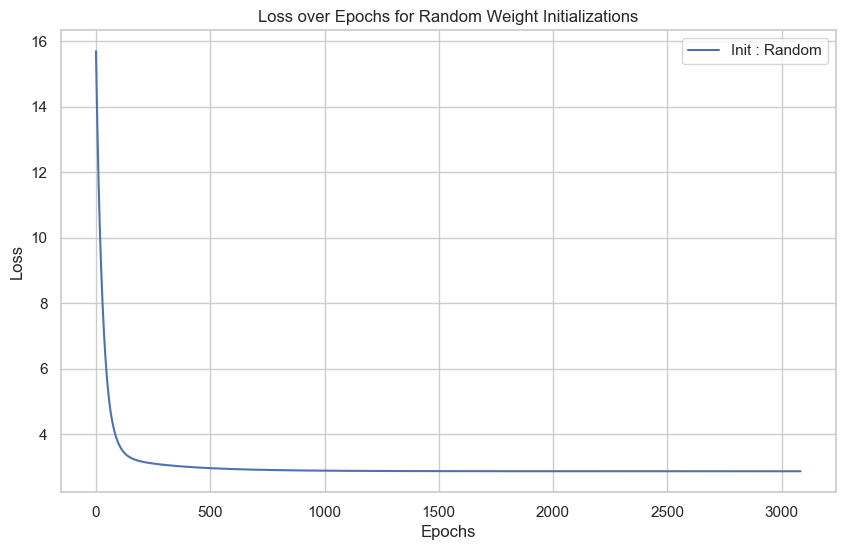

In [117]:
#intializing the weights as random
N, d = X_train.shape 

w = weight_random(d)

print(w)

w, losses = gradient_descent(X_train, Y_train, lambda1, lambda2, alpha, epochs, w, tol, flag = True)

results = []

results.append(losses)

# Display the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(results[0], label = "Init : Random")

plt.title("Loss over Epochs for Random Weight Initializations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Converged at iteration 2456: Gradient norm 0.009994960828757185


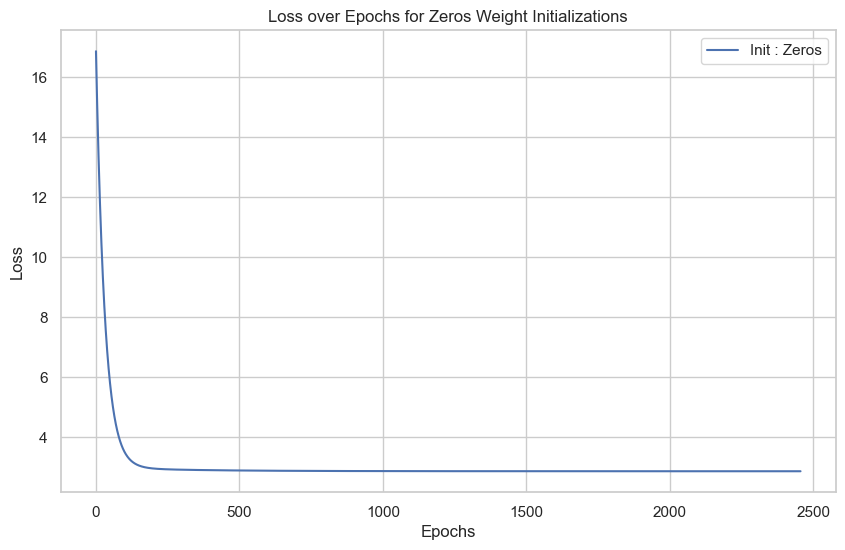

In [119]:
#intializing the weights as zeros
N, d = X_train.shape 

w = weight_zeros(d)

print(w)

w, losses = gradient_descent(X_train, Y_train, lambda1, lambda2, alpha, epochs, w, tol, flag = True)

results.append(losses)

# Display the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(results[1], label = "Init : Zeros")

plt.title("Loss over Epochs for Zeros Weight Initializations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

[[ 0.69605399]
 [ 0.05943681]
 [-0.48635627]
 [-0.73455197]
 [-0.1054969 ]
 [ 0.2318577 ]
 [-0.64857428]
 [-0.43579815]]
Converged at iteration 3056: Gradient norm 0.009991864586932464


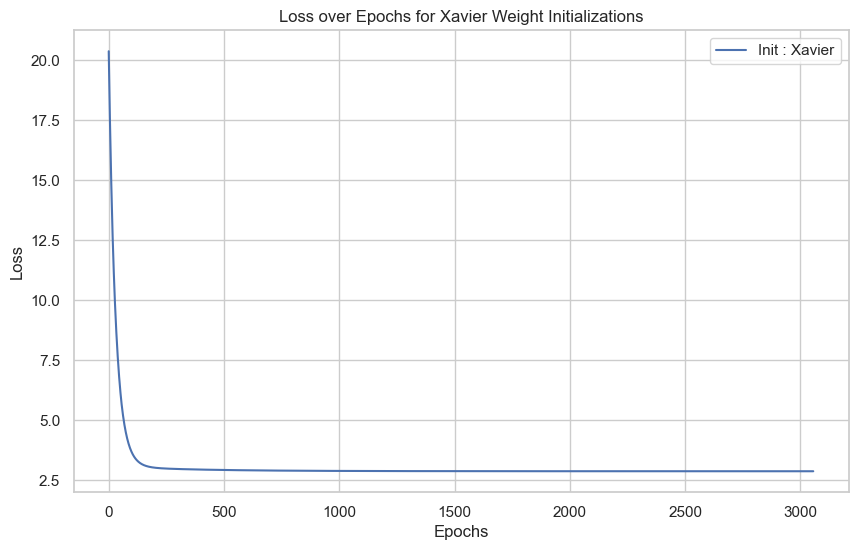

In [121]:
#intializing the weights Xavier (Glorot) Initialization
N, d = X_train.shape 

w = weight_xavier(d)

print(w)

w, losses = gradient_descent(X_train, Y_train, lambda1, lambda2, alpha, epochs, w, tol, flag = True)

results.append(losses)

best_results = {}

best_results[0]= {'weights': w, 'loss_history': losses}

# Display the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(results[2], label = "Init : Xavier")

plt.title("Loss over Epochs for Xavier Weight Initializations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

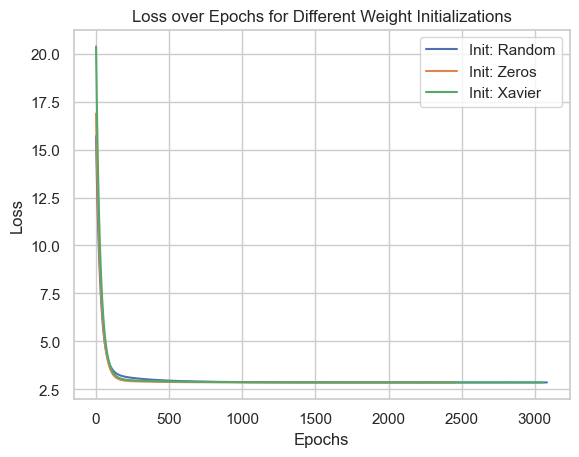

In [123]:
plt.plot(results[0], label="Init: Random")

plt.plot(results[1], label="Init: Zeros")

plt.plot(results[2], label="Init: Xavier")

plt.title("Loss over Epochs for Different Weight Initializations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [125]:
def predict(X, w):
    return X.dot(w)

best_method = 'xavier'  
best_weights = best_results[0]['weights']

Y_pred_test = predict(X_test, best_weights)



print("Testing MSE:", losses[-1])


Testing MSE: 2.864447515225425


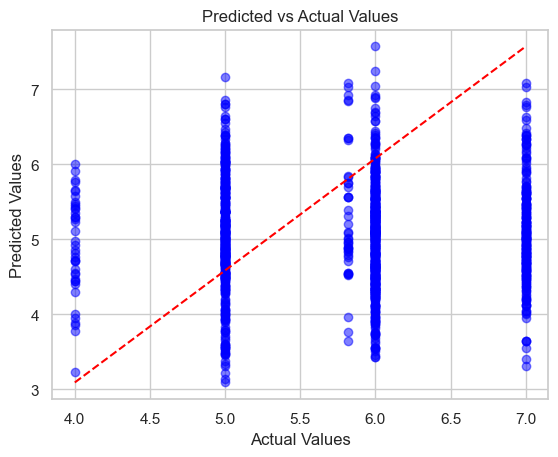

In [127]:
plt.scatter(Y_test, Y_pred_test, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_pred_test), max(Y_pred_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [129]:
import pickle 

model_weights = {
    "weights": best_weights       
}

with open("gsingh55_smituple_assignment1_part4.pkl", "wb") as file:
    pickle.dump(model_weights, file)

In [76]:
#Refrences :

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html